In [30]:
###paths#####
#############
import sys
import os

pwd = os.getcwd()
modellingpath = pwd.rpartition("modelling")[0] + pwd.rpartition("modelling")[1] 
sys.path.append(modellingpath + '/lib')
#############
# 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pickle
import pandas as pd
import psycopg2
import plotly.graph_objects as go
import pandas as pd




#### create confusion openboundary lsa vs edgegrowth2



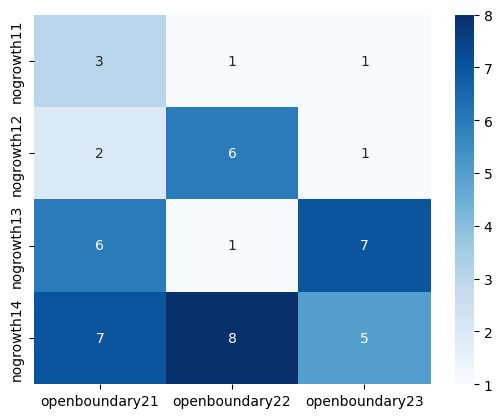

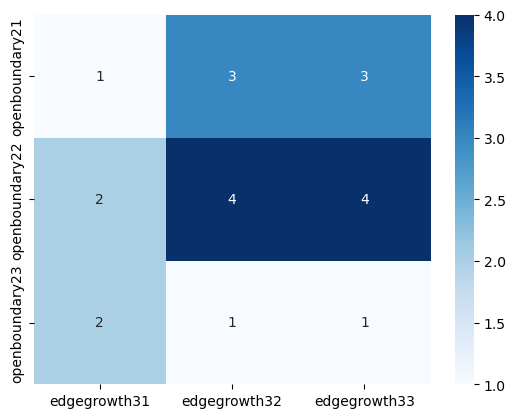

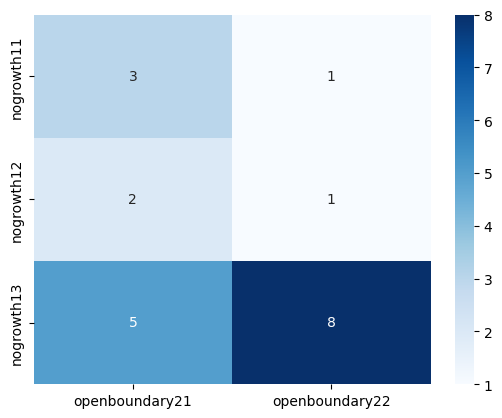

In [31]:
import numpy as np
import pandas as pd
import seaborn as sns 



d1 = {'openboundary21': [3,2,6,7], 'openboundary22': [1,6,1,8], 'openboundary23':[1,1,7,5]}
df1 = pd.DataFrame(data=d1, index=['nogrowth11','nogrowth12','nogrowth13', 'nogrowth14'])

d2 = {'edgegrowth31': [1, 2,2], 'edgegrowth32': [3, 4,1],'edgegrowth33': [3, 4,1]  }
df2 = pd.DataFrame(data=d2, index=['openboundary21','openboundary22', 'openboundary23'])
sns.heatmap(df1, annot=True, cmap='Blues')
plt.show()

sns.heatmap(df2, annot=True, cmap='Blues')
plt.show()

# #full setup
# d1 = {'openboundary21': [3,2,5,4], 'openboundary22': [1,1,8,4], 'openboundary23': [1,1,8,4], 'openboundary24': [1,1,8,4], 'openboundary25':[1,1,8,4]}
# df1 = pd.DataFrame(data=d1, index=['nogrowth11','nogrowth12','nogrowth13', 'nogrowth14'])

# d2 = {'edgegrowth31': [1, 2,1,2,5], 'edgegrowth32': [3, 4,5,7,2],'edgegrowth33': [3, 4,3,7,9], 'edgegrowth34': [3, 4,3,7,9], 'edgegrowth35': [3, 4,3,7,9] }
# df2 = pd.DataFrame(data=d2, index=['openboundary21','openboundary22', 'openboundary23', 'openboundary24', 'openboundary25'])
# sns.heatmap(df1, annot=True, cmap='Blues')
# plt.show()

# sns.heatmap(df2, annot=True, cmap='Blues')
# plt.show()
# # 323 - 232


# original working setup 
d1 = {'openboundary21': [3,2,5], 'openboundary22': [1,1,8]}
df1 = pd.DataFrame(data=d1, index=['nogrowth11','nogrowth12','nogrowth13'])

d2 = {'edgegrowth31': [1, 2], 'edgegrowth32': [3, 4],'edgegrowth33': [3, 4]  }
df2 = pd.DataFrame(data=d2, index=['openboundary21','openboundary22'])
sns.heatmap(df1, annot=True, cmap='Blues')
plt.show()

# sns.heatmap(df2, annot=True, cmap='Blues')
# plt.show()

# 455 - 5

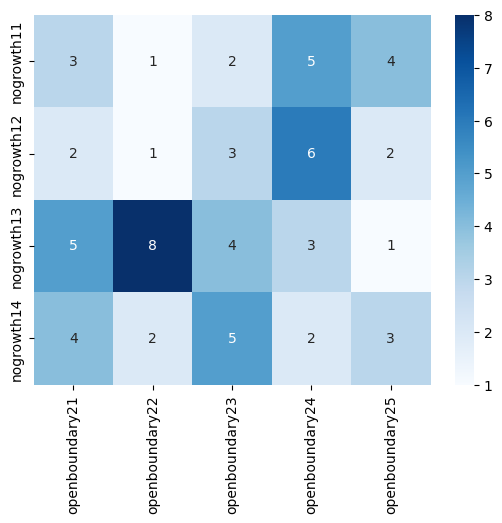

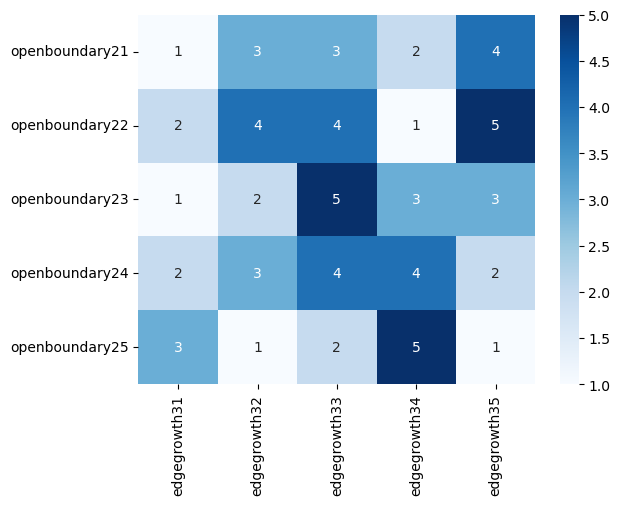

In [37]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# df1 with 4 index and 5 columns
d1 = {
    'openboundary21': [3, 2, 5, 4],
    'openboundary22': [1, 1, 8, 2],
    'openboundary23': [2, 3, 4, 5], 
    'openboundary24': [5, 6, 3, 2], 
    'openboundary25': [4, 2, 1, 3]
}
df1 = pd.DataFrame(data=d1, index=['nogrowth11', 'nogrowth12', 'nogrowth13', 'nogrowth14'])

# df2 with 5 index and 5 columns
d2 = {
    'edgegrowth31': [1, 2, 1, 2, 3],
    'edgegrowth32': [3, 4, 2, 3, 1],
    'edgegrowth33': [3, 4, 5, 4, 2],
    'edgegrowth34': [2, 1, 3, 4, 5], 
    'edgegrowth35': [4, 5, 3, 2, 1]
}
df2 = pd.DataFrame(data=d2, index=['openboundary21', 'openboundary22', 'openboundary23', 'openboundary24', 'openboundary25'])

# Heatmap of df1
sns.heatmap(df1, annot=True, cmap='Blues')
plt.show()
# Heatmap of df2
sns.heatmap(df2, annot=True, cmap='Blues')
plt.show()


In [32]:

labels =list( df1.index) 
columns = list(df1.columns) 

node_labels = labels + columns

color_list = ['blue', 'green', 'orange', 'purple', 'red','yellow','black','brown','pink']

input_colors={}
for l,c in zip(node_labels,color_list):
    input_colors[l]=c

# Prepare data for Plotly Sankey Diagram
link_source = []
link_target = []
link_value = []
link_color=[]

for i, row_label in enumerate(labels):
    # input_color = input_colors[row_label]
    # input_color='blue'

    for j, col_label in enumerate(columns):
        count = df1.loc[row_label, col_label]
        link_source.append(i)
        link_target.append(len(labels) + j)
        link_value.append(count)
        # link_color.append(input_color)


# Create the Plotly Sankey Diagram
fig = go.Figure(data=[go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=node_labels,
        # color=link_color,
    ),
    link=dict(
        source=link_source,
        target=link_target,
        value=link_value,
        # color=link_color
    )
)])

# Customize the plot layout
fig.update_layout(
    title_text="Open boundary vs. Growth",
    font_size=10,
    width=800,
    height=600,
)

# Show the plot
fig.show()


In [33]:


labels =list( df2.index)
columns = list(df2.columns)
node_labels = labels + columns

color_list = ['blue', 'green', 'orange', 'purple', 'red','yellow','black','brown','pink']

input_colors={}
for l,c in zip(node_labels,color_list):
    input_colors[l]=c

# Prepare data for Plotly Sankey Diagram
link_source = []
link_target = []
link_value = []
link_color=[]

for i, row_label in enumerate(labels):
    # input_color = input_colors[row_label]
    # input_color='blue'

    for j, col_label in enumerate(columns):
        count = df2.loc[row_label, col_label]
        link_source.append(i)
        link_target.append(len(labels) + j)
        link_value.append(count)
        # link_color.append(input_color)


# Create the Plotly Sankey Diagram
fig = go.Figure(data=[go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=node_labels,
        # color=link_color,
    ),
    link=dict(
        source=link_source,
        target=link_target,
        value=link_value,
        # color=link_color
    )
)])

# Customize the plot layout
fig.update_layout(
    title_text="Open boundary vs. Growth",
    font_size=10,
    width=800,
    height=600,
)

# Show the plot
fig.show()


In [41]:
node_labels.append(node_labels[14])

In [42]:
import plotly.graph_objects as go

# Assuming you have data for two separate Sankey diagrams (patternclass_cf1 and patternclass_cf2)
# Merge the data from the two Sankey diagrams



labels1 = list(df1.index)
columns1 = list(df1.columns)

labels2 = list(df2.index)
columns2 = list(df2.columns)

node_labels = labels1 + labels2 + columns1 + columns2

# # Filter the labels and columns based on the desired order
# labels2 = [label for label in desired_order_labels2 if label in labels2]
# columns2 = [column for column in desired_order_columns2 if column in columns2]

node_labels = labels1 + labels2 + columns1 + columns2
node_labels.append(node_labels[14])

# Prepare data for the merged Sankey diagram
link_source = []
link_target = []
link_value = []

for i, row_label in enumerate(labels1):
    for j, col_label in enumerate(columns1):
        count = df1.loc[row_label, col_label]
        link_source.append(i)
        link_target.append(len(labels1) + j)
        link_value.append(count)
        print(link_source, link_target, link_value)

for i, row_label in enumerate(labels2):
    for j, col_label in enumerate(columns2):
        count = df2.loc[row_label, col_label]
        # print(row_label, col_label, count)
        link_source.append(len(labels1) + i)
        link_target.append(2 * len(labels2) + len(columns2) + j)
        link_value.append(count)
        print(link_source, link_target, link_value)

# Create the merged Plotly Sankey Diagram
fig = go.Figure(data=[go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=node_labels,
    ),
    link=dict(
        source=link_source,
        target=link_target,
        value=link_value,
    )
)])

# Customize the plot layout
fig.update_layout(
    title_text="No growth vs. Open boundary vs. Growth",
    font_size=10,
    width=800,
    height=600,
)

# Show the plot
fig.show()


[0] [4] [3]
[0, 0] [4, 5] [3, 1]
[0, 0, 0] [4, 5, 6] [3, 1, 2]
[0, 0, 0, 0] [4, 5, 6, 7] [3, 1, 2, 5]
[0, 0, 0, 0, 0] [4, 5, 6, 7, 8] [3, 1, 2, 5, 4]
[0, 0, 0, 0, 0, 1] [4, 5, 6, 7, 8, 4] [3, 1, 2, 5, 4, 2]
[0, 0, 0, 0, 0, 1, 1] [4, 5, 6, 7, 8, 4, 5] [3, 1, 2, 5, 4, 2, 1]
[0, 0, 0, 0, 0, 1, 1, 1] [4, 5, 6, 7, 8, 4, 5, 6] [3, 1, 2, 5, 4, 2, 1, 3]
[0, 0, 0, 0, 0, 1, 1, 1, 1] [4, 5, 6, 7, 8, 4, 5, 6, 7] [3, 1, 2, 5, 4, 2, 1, 3, 6]
[0, 0, 0, 0, 0, 1, 1, 1, 1, 1] [4, 5, 6, 7, 8, 4, 5, 6, 7, 8] [3, 1, 2, 5, 4, 2, 1, 3, 6, 2]
[0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2] [4, 5, 6, 7, 8, 4, 5, 6, 7, 8, 4] [3, 1, 2, 5, 4, 2, 1, 3, 6, 2, 5]
[0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2] [4, 5, 6, 7, 8, 4, 5, 6, 7, 8, 4, 5] [3, 1, 2, 5, 4, 2, 1, 3, 6, 2, 5, 8]
[0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2] [4, 5, 6, 7, 8, 4, 5, 6, 7, 8, 4, 5, 6] [3, 1, 2, 5, 4, 2, 1, 3, 6, 2, 5, 8, 4]
[0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2] [4, 5, 6, 7, 8, 4, 5, 6, 7, 8, 4, 5, 6, 7] [3, 1, 2, 5, 4, 2, 1, 3, 6, 2, 5, 8, 4, 3]
[0, 0, 0, 0, 